Author: Nicolas Legrand <nicolas.legrand@cfin.au.dk>

In [1]:
%%capture
! pip install git+https://github.com/LegrandNico/metadPy.git
! pip install numpyro

In [3]:
import arviz as az
import numpyro
from metadPy.bayesian import hmetad
from metadPy import load_dataset

# Set the number of cores used by Numpyro
numpyro.set_host_device_count(2)

# Fitting data at the group level

## From data frame

In [4]:
# Load data
group_df = load_dataset("rm")
this_df = group_df[group_df.Condition == 0]

This function will return two variable. The first one is a Pymc3 model variable

In [5]:
model, traces = hmetad(
    data=this_df,
    nRatings=4,
    stimuli="Stimuli",
    accuracy="Accuracy",
    confidence="Confidence",
    subject="Subject",
    backend="numpyro",
)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

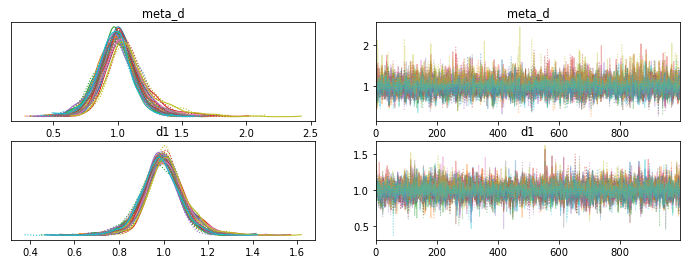

In [19]:
az.plot_trace(traces, var_names=["meta_d", "d1"]);

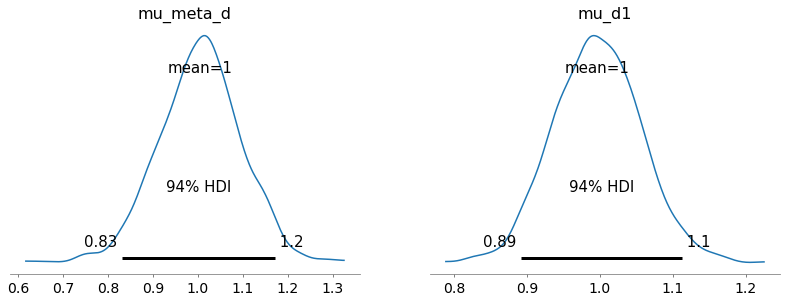

In [17]:
az.plot_posterior(traces, var_names=["mu_meta_d", "mu_d1"]);

In [18]:
az.summary(traces, var_names=["mu_meta_d", "mu_d1"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_meta_d,1.004,0.093,0.831,1.173,0.002,0.001,2483.0,1327.0,1.0
mu_d1,0.996,0.060,0.891,1.113,0.001,0.001,2546.0,1392.0,1.0
